In [1]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils.land import get_ocean_coords, get_land_coords
from isca_tools.utils import area_weighting, lat_lon_slice
from isca_tools.land import write_land
from isca_tools.sst import write_sst

2024-07-30 21:07:44,858 - isca - WARNING - Environment variable GFDL_SOC not set, but this is only required if using SocratesCodebase. Setting to None


## Write SST file
Take annual average of previous 5m depth experiment, take annual average so can use these fixed SSTs in new experiment.

In [15]:
# xr.load_dataset('zhang_example/sst.nc', decode_times=False)

In [16]:
# Load in SSTs from previous simulation, and take annual average to get SSTs to use
sst_file = 'tau_sweep/aquaplanet/k=1/'
use_time_start = 360*2
sst_use = isca_tools.load_dataset(sst_file)['t_surf']
sst_use = sst_use.sel(time=slice(use_time_start, np.inf))
sst_use = sst_use.mean(dim='time').load()

In [17]:
isca_path = '/Users/joshduffield/Documents/StAndrews/Isca/jobs/'
exp_dir = 'rossbypalooza/narrow/lat_30/1/'
write_sst(isca_path+exp_dir+'sst', isca_path+exp_dir+'namelist.nml', sst_use.to_numpy())

ValueError: The file /Users/joshduffield/Documents/StAndrews/Isca/jobs/rossbypalooza/narrow/lat_30/1/sst.nc already exists. Delete or re-name this to continue.

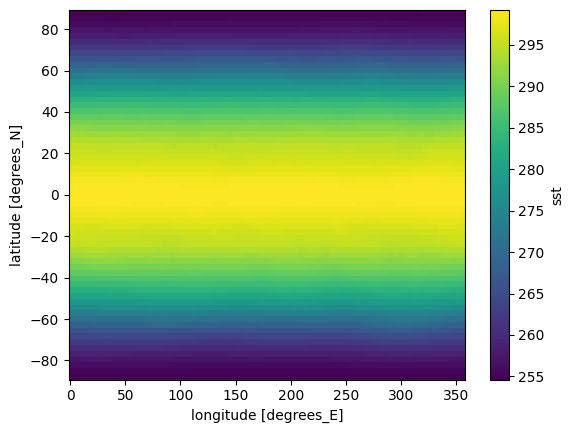

In [18]:
sst_saved = xr.load_dataset(isca_path+exp_dir+'sst.nc')
sst_saved.sst.plot()

## Create land
Create zonal strip of land in mid latitude to keep peak temperature near this region as vary rotation rate.

In [39]:
n_lat_land_cells = 4

lat_min = 30
lat_max = 42
# lat_min = 40
# lat_max = 80
write_land(isca_path+exp_dir+'land', isca_path+exp_dir+'namelist.nml', 'square', [lat_min, lat_max, 0-10, 360+10])

Output written to: /Users/joshduffield/Documents/StAndrews/Isca/jobs/rossbypalooza/narrow/lat_30/1/land.nc


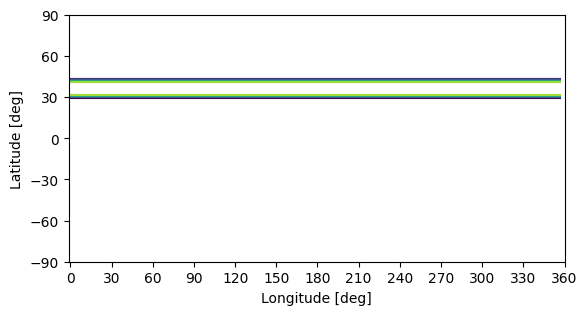

In [40]:
job_dir = os.path.join(os.path.dirname(os.environ['GFDL_DATA']), 'jobs')
land_file_name = os.path.join(job_dir, exp_dir, 'land.nc')
isca_tools.plot.show_land(land_file_name)

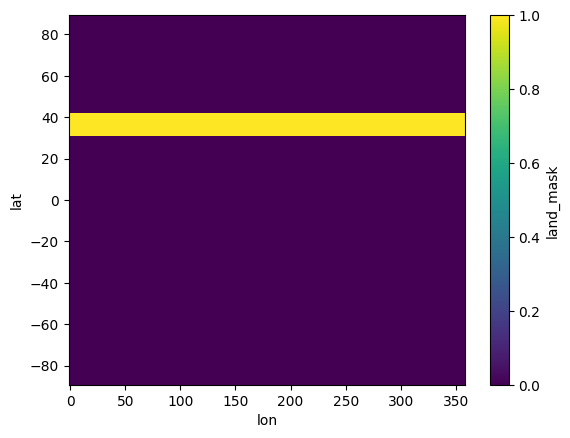

In [41]:
xr.load_dataset(land_file_name).land_mask.plot()

In [45]:
if float(xr.load_dataset(land_file_name).land_mask.isel(lon=0).sum()) != n_lat_land_cells:
    raise ValueError(f'Land mask has {float(xr.load_dataset(land_file_name).land_mask.isel(lon=0).sum())}, not {n_lat_land_cells} land lat coordinates')
else: 
    print(f'The land mask has {n_lat_land_cells} land latitudes')

The land mask has 4 land latitudes


## Sanity check that SST does not change with time
For land, it clearly does though.

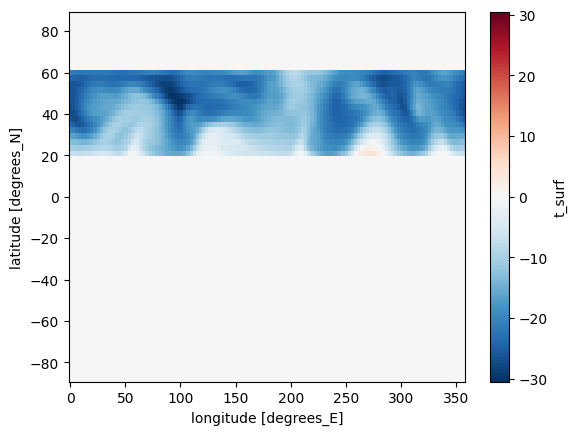

In [42]:
ds = isca_tools.load_dataset(exp_dir)['t_surf']
(ds.isel(time=-1)-ds.isel(time=0)).plot()

## Write variable evaporative fraction file

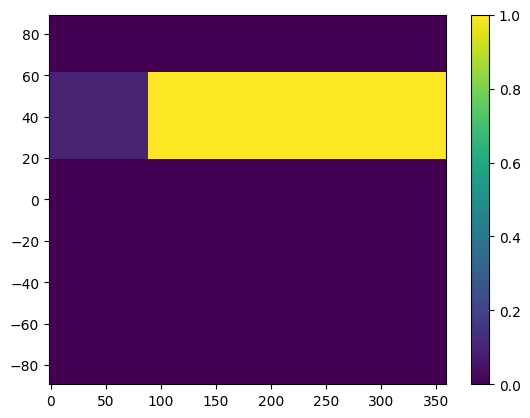

In [25]:
# zhang example
im = xr.load_dataset('/Users/joshduffield/Documents/StAndrews/Isca/modified_source_code/zhang_vary_evap_prefactor/land_evap_prefactor.nc')
plt.pcolormesh(im.lon, im.lat, im.land_evap_prefactor)
plt.colorbar()

In [26]:
np.unique(im.to_numpy())

AttributeError: 'Dataset' object has no attribute 'to_numpy'

In [29]:
np.unique(im.land_evap_prefactor)

array([0. , 0.1, 1. ], dtype=float32)